# **Tutorial Parte 0: Conhecendo o MNE**


In [3]:
!pip install mne

     |████████████████████████████████| 6.9 MB 1.4 MB/s 


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
%matplotlib inline
import mne 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [5]:
data_name = "oddball_example_small-fif.gz"

#Exemplo de dado retirado do bootcamp

1.1 Visualização dos dados e objetos puros

In [6]:
cd /gdrive/MyDrive/MNETutorialDataSets

/gdrive/MyDrive/MNETutorialDataSets


In [7]:
raw = mne.io.read_raw_fif(data_name, preload=True)

Opening raw data file oddball_example_small-fif.gz...


<ipython-input-7-41ef88fb0ba0>:1: RuntimeWarning: This filename (oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(data_name, preload=True)


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


*Nota 1:* Testar os métodos possíveis de modificar o objeto a partir do comando ```raw.algumaCoisa```;

Ao digitar ```raw.algumaCoisa?``` é aberta uma janela com detalhes do comando.



In [8]:
raw.filter(1, 20)
type(raw)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 sec)



mne.io.fiff.raw.Raw

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


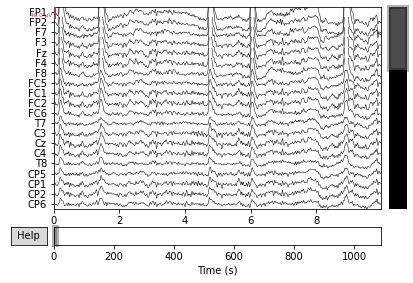

In [9]:
raw.plot();

#Procurar resolver bug visual do tamanho da imagem

Retângulos em vermelho representam os artifacts

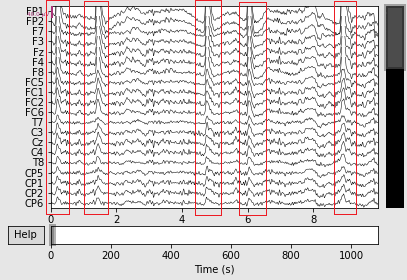

In [10]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

<ipython-input-10-d5ac3de0024b>:1: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ICA(n_components=20, random_state=0)


In [12]:
ica.fit(raw.copy().filter(8,35))

#Filtrandos das ondas alfa até delta

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 sec)

Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 12.1s.


<ICA | raw data decomposition, fit (fastica): 109098 samples, 20 components, channels used: "eeg">

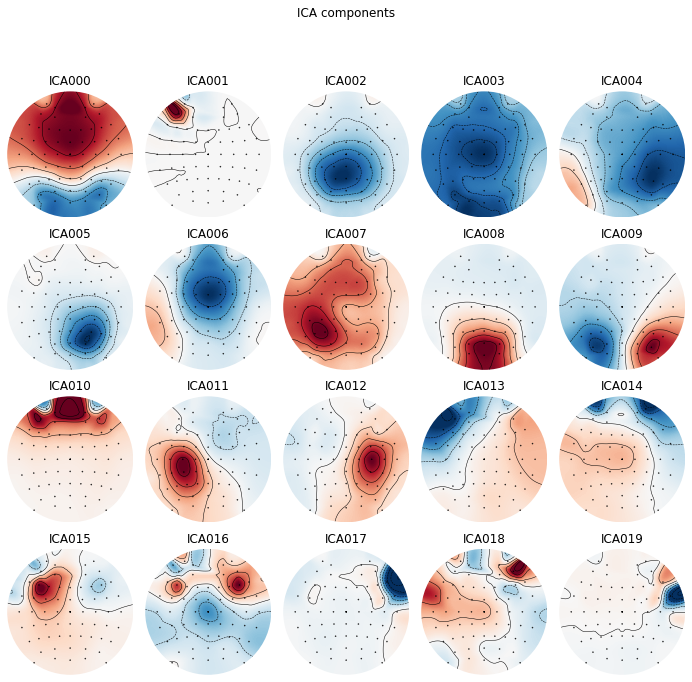

[<MNEFigure size 702x696.24 with 20 Axes>]

In [13]:
ica.plot_components(outlines='skirt')

In [14]:
ica.exclude = [1, 10, 14, 17, 18, 19]

#Canais que interferem e produzem os artifacts
#Analisar os algoritmos prontos que fazem isso 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


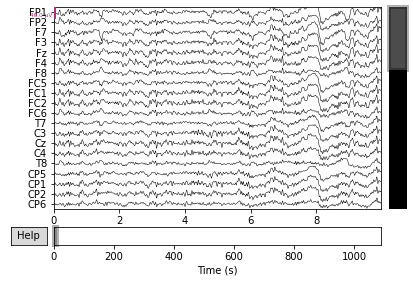

In [16]:
ica.apply(raw.copy(), exclude=ica.exclude).plot();

# Épocas

In [17]:
events = mne.find_events(raw)

903 events found
Event IDs: [100 200]


<Figure size 640x480 with 0 Axes>

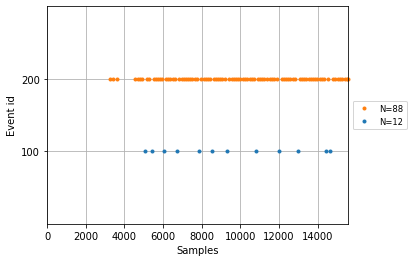

In [26]:
figure(figsize=(8, 6), dpi=80)
mne.viz.plot_events(events[:100]);